In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


In [2]:
dataset = pd.read_csv('../input/videogamesales/vgsales.csv', index_col='Rank')
print(dataset.head())
print(dataset.info())

                          Name Platform    Year         Genre Publisher  \
Rank                                                                      
1                   Wii Sports      Wii  2006.0        Sports  Nintendo   
2            Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.

In [3]:
dataset_nulls = dataset.isnull()
print(dataset_nulls)

        Name  Platform   Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Rank                                                                            
1      False     False  False  False      False     False     False     False   
2      False     False  False  False      False     False     False     False   
3      False     False  False  False      False     False     False     False   
4      False     False  False  False      False     False     False     False   
5      False     False  False  False      False     False     False     False   
...      ...       ...    ...    ...        ...       ...       ...       ...   
16596  False     False  False  False      False     False     False     False   
16597  False     False  False  False      False     False     False     False   
16598  False     False  False  False      False     False     False     False   
16599  False     False  False  False      False     False     False     False   
16600  False     False  Fals

In [4]:
dataset = dataset.dropna()
print(dataset)

                                                   Name Platform    Year  \
Rank                                                                       
1                                            Wii Sports      Wii  2006.0   
2                                     Super Mario Bros.      NES  1985.0   
3                                        Mario Kart Wii      Wii  2008.0   
4                                     Wii Sports Resort      Wii  2009.0   
5                              Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
16596                Woody Woodpecker in Crazy Castle 5      GBA  2002.0   
16597                     Men in Black II: Alien Escape       GC  2003.0   
16598  SCORE International Baja 1000: The Official Game      PS2  2008.0   
16599                                        Know How 2       DS  2010.0   
16600                                  Spirits & Spells      GBA  2003.0   

           

In [5]:
#How many platforms are there in the dataset? 

dataset_countplatforms = dataset['Platform'].nunique()
print("There is", dataset_countplatforms, "platforms.")

#How many videogames are there in the dataset? 

dataset_countnames = dataset['Name'].nunique()
print("There are", dataset_countnames, "games.")

#Years to years?

Year_Min = dataset['Year'].min()
Year_Max = dataset['Year'].max()
print("The dataset starts in:", Year_Min)
print("The dataset ends in:", Year_Max)

There is 31 platforms.
There are 11325 games.
The dataset starts in: 1980.0
The dataset ends in: 2020.0


              Global_Sales
Genre                     
Action             1722.84
Adventure           234.59
Fighting            444.05
Misc                789.87
Platform            829.13
Puzzle              242.21
Racing              726.76
Role-Playing        923.83
Shooter            1026.20
Simulation          389.98
Sports             1309.24
Strategy            173.27


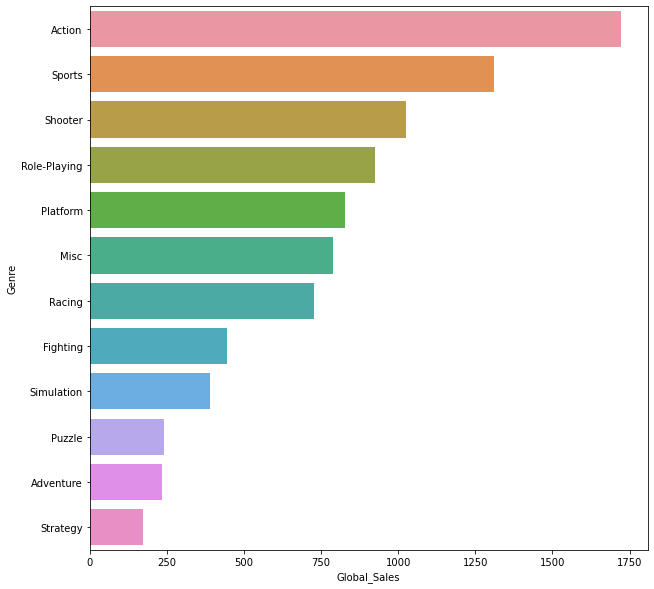

In [6]:
#Most popular genre in the dataset by Sum of Worldwide Sales

Grouped_Genre = dataset.pivot_table(values='Global_Sales',index='Genre', aggfunc='sum')
print(Grouped_Genre)
Grouped_Genre = Grouped_Genre.sort_values(by = 'Global_Sales',ascending  = False)

# Plot the data  
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(Grouped_Genre['Global_Sales'],Grouped_Genre.index, orient='h')
plt.show()

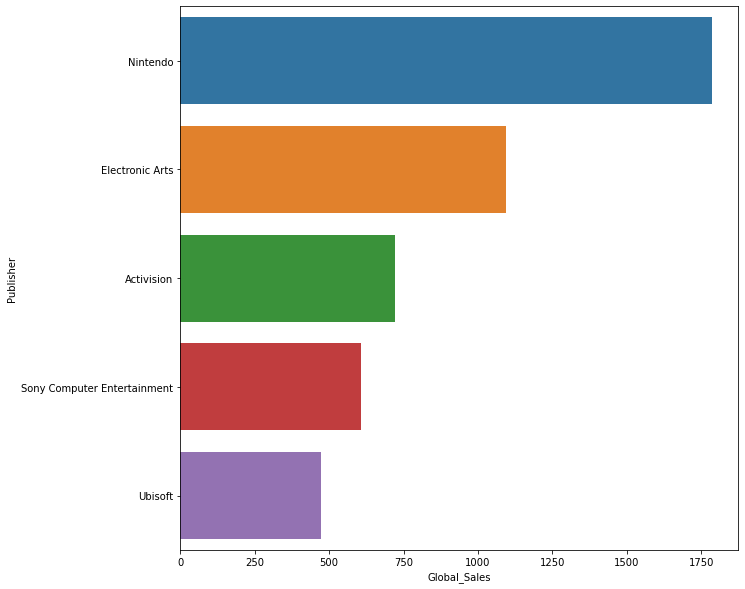

In [7]:
#5 best Publisher  

plt.rcParams['figure.figsize'] = (10,10)
Publisher_Sales  = dataset.pivot_table(index = 'Publisher' ,values = 'Global_Sales',aggfunc = np.sum)
Publisher_Sales  = Publisher_Sales.sort_values(by = 'Global_Sales',ascending  = False).head(5)
sns.barplot(Publisher_Sales['Global_Sales'],Publisher_Sales.index, orient='h')
plt.show()

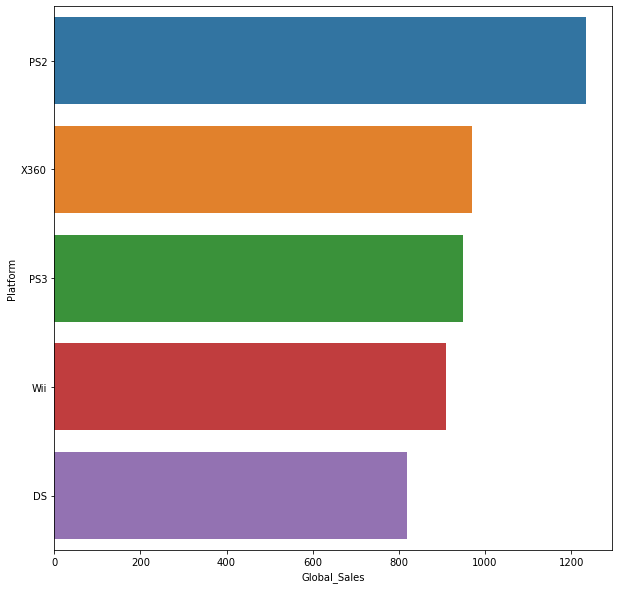

In [8]:
#5 Best Platform

plt.rcParams['figure.figsize'] = (10,10)
Platform_Sales  = dataset.pivot_table(index = 'Platform' ,values = 'Global_Sales',aggfunc = np.sum)
Platform_Sales  = Platform_Sales.sort_values(by = 'Global_Sales',ascending  = False).head(5)
sns.barplot(Platform_Sales['Global_Sales'],Platform_Sales.index, orient='h')
plt.show()

                                Global_Sales
Name                                        
Wii Sports                             82.74
Grand Theft Auto V                     55.92
Super Mario Bros.                      45.31
Tetris                                 35.84
Mario Kart Wii                         35.82
Wii Sports Resort                      33.00
Pokemon Red/Pokemon Blue               31.37
Call of Duty: Modern Warfare 3         30.83
New Super Mario Bros.                  30.01
Call of Duty: Black Ops II             29.72


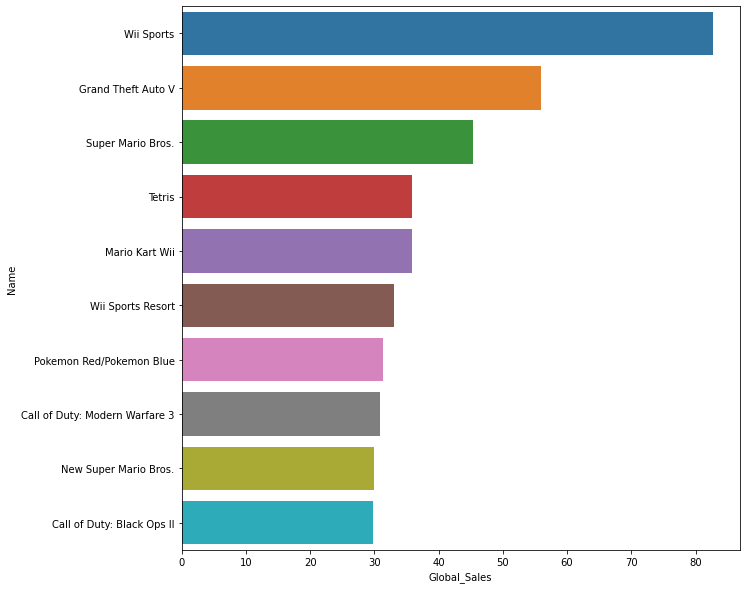

In [9]:
#Best games 

plt.rcParams['figure.figsize'] = (10,10)
Games_Sales  = dataset.pivot_table(index = 'Name' ,values = 'Global_Sales',aggfunc = np.sum)
Games_Sales  = Games_Sales.sort_values(by = 'Global_Sales', ascending  = False).head(10)
print(Games_Sales)
sns.barplot(Games_Sales['Global_Sales'],Games_Sales.index, orient='h')
plt.show()

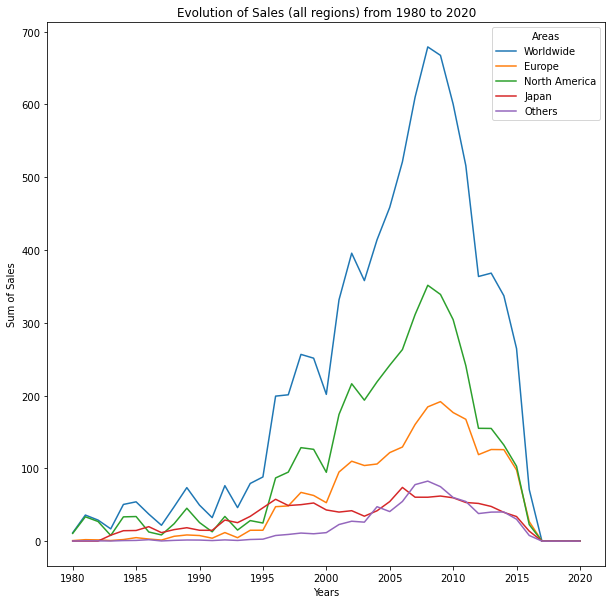

In [10]:
#Global Sales Evolution 

Global_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'Global_Sales',aggfunc = np.sum)
sns.lineplot(Global_Sales_Evolution.index, Global_Sales_Evolution['Global_Sales'])

#EU Sales Evolution 

EU_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'EU_Sales',aggfunc = np.sum)
sns.lineplot(EU_Sales_Evolution.index, EU_Sales_Evolution['EU_Sales'])

#NA Sales Evolution 

NA_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'NA_Sales',aggfunc = np.sum)
sns.lineplot(NA_Sales_Evolution.index, NA_Sales_Evolution['NA_Sales'])

#JP Sales Evolution 

JP_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'JP_Sales',aggfunc = np.sum)
sns.lineplot(JP_Sales_Evolution.index, JP_Sales_Evolution['JP_Sales'])

#Other Sales Evolution 

O_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'Other_Sales',aggfunc = np.sum)
sns.lineplot(O_Sales_Evolution.index, O_Sales_Evolution['Other_Sales'])

plt.rcParams['figure.figsize'] = (10,10)
plt.legend(title='Areas', loc='upper right', labels=['Worldwide', 'Europe', 'North America', 'Japan', 'Others'])
plt.title("Evolution of Sales (all regions) from 1980 to 2020")
plt.ylabel("Sum of Sales")
plt.xlabel("Years")
plt.show()

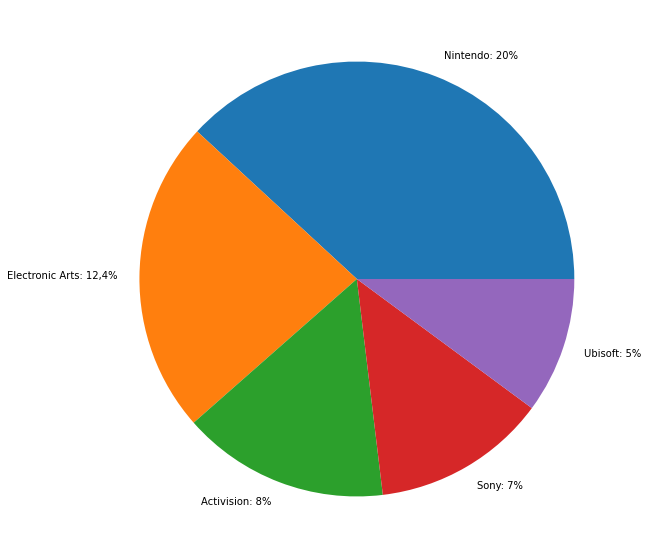

In [11]:
#Market Share Publishers 

All_Sales = dataset["Global_Sales"].sum()
Sales_Nintendo = dataset[dataset["Publisher"] == "Nintendo"]["Global_Sales"].sum() 
Sales_Nintendo = (Sales_Nintendo / All_Sales) * 100
Sales_Electronic_Arts = dataset[dataset["Publisher"] == "Electronic Arts"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Activision = dataset[dataset["Publisher"] == "Activision"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Sony = dataset[dataset["Publisher"] == "Sony Computer Entertainment"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Ubisoft = dataset[dataset["Publisher"] == "Ubisoft"]["Global_Sales"].sum() * 100 / All_Sales
Market_Plot = [Sales_Nintendo, Sales_Electronic_Arts, Sales_Activision, Sales_Sony, Sales_Ubisoft]
plt.pie(Market_Plot, labels=['Nintendo: 20%', 'Electronic Arts: 12,4%', 'Activision: 8%', 'Sony: 7%', 'Ubisoft: 5%'])
plt.show()

In [12]:
#Best video games

Genre_Nintendo = dataset[dataset["Name"] == "Electronic Arts"]
Best_Nintendo = dataset.groupby(['Publisher', 'Name'])['Global_Sales'].sum()
print(Best_Nintendo)

Publisher             Name                                  
10TACLE Studios       Boulder Dash: Rocks!                      0.03
                      Panzer Tactics                            0.06
                      Pirates: Legend of the Black Buccaneer    0.02
1C Company            King's Bounty: Armored Princess           0.01
                      Men of War: Assault Squad                 0.05
                                                                ... 
imageepoch Inc.       SoniPro                                   0.01
                      Toushin Toshi                             0.03
inXile Entertainment  Wasteland 2                               0.10
mixi, Inc             Monster Strike 3DS                        0.86
responDESIGN          Yourself Fitness                          0.13
Name: Global_Sales, Length: 11696, dtype: float64
